In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error

In [5]:
# Load dataset
df = pd.read_csv('Book.csv')  # Replace with your file

drop_cols = [
    'Meeting Link', 'Tags','Notifications Enabled','Reminder Date','Attachments','Custom Field 1','Custom Field 2','Blockers','Color Code']
df.drop(columns=drop_cols, inplace=True)

# Handle dates
df['Due Date'] = pd.to_datetime(df['Due Date'], errors='coerce')
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Create target column for on-time completion
df['On_Time_Completion'] = (df['Last Updated'] <= df['Due Date']).astype(int)

# Encode necessary categorical fields
label_cols = ['Category', 'Sub-Category', 'Risk Level', 'Dependencies', 
              'Status', 'Priority', 'Assigned To']

C:\Users\swapnil\AppData\Local\Temp\ipykernel_61740\1767425528.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Due Date'] = pd.to_datetime(df['Due Date'], errors='coerce')
C:\Users\swapnil\AppData\Local\Temp\ipykernel_61740\1767425528.py:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')


In [6]:
df.isnull().sum()

Task ID                      0
Task Name                    0
Description                  0
Priority                     0
Status                       0
Due Date                     0
Assigned To                  0
Created By                   0
Creation Date                0
Last Updated                75
Dependencies                10
Estimated Effort (Hours)     0
Actual Effort (Hours)        0
Completion Percentage       75
Notes                        9
Category                     0
Sub-Category                 0
Location                     0
Risk Level                   0
Risk Description             0
Resolution Plan              0
Unnamed: 30                 62
On_Time_Completion           0
dtype: int64

In [7]:
df.head()

,Task ID,Task Name,Description,Priority,Status,Due Date,Assigned To,Created By,Creation Date,Last Updated,...,Completion Percentage,Notes,Category,Sub-Category,Location,Risk Level,Risk Description,Resolution Plan,Unnamed: 30,On_Time_Completion
0,TASK026,Update Project Timeline,Revise the project schedule based on recent pr...,High,In Progress,2025-04-29,John Doe,Jane Smith,18-04-2025,2025-04-21,...,70,Need to incorporate feedback on staging deploy...,Project Planning,Scheduling,Online,Medium,Potential slippage due to deployment issues.,Re-evaluate dependencies and allocate buffer t...,NaN,1
1,TASK027,Develop User Profile Page,Implement the frontend and backend logic for u...,High,In Progress,2025-05-05,Alice Brown,Bob Green,18-04-2025,2025-04-22,...,83,Integrating with authentication service.,Development,User Accounts,Local,Low,Minor UI alignment issues.,Address during final testing.,NaN,1
2,TASK028,Run A/B Tests on Landing Page,Experiment with different versions of the land...,Medium,To Do,2025-05-12,Jane Smith,Charlie White,18-04-2025,NaT,...,NaN,0,Define key metrics and target audience segments.,Marketing,Local,Medium,Minor UI alignment issues.,Traffic volume might affect test duration.,Hypothesis 1,0
3,TASK029,Implement Role-Based Access Control,Secure the application by implementing differe...,High,To Do,2025-05-19,Bob Green,David Black,18-04-2025,NaT,...,NaN,0,Need clear definition of user roles and permis...,Development,Local,Medium,Minor UI alignment issues.,Potential security vulnerabilities if not impl...,Permissions Matrix,0
4,TASK030,Create API Documentation (v2),Update the API documentation to reflect the la...,Low,In Progress,2025-05-26,Charlie White,Eve Grey,18-04-2025,2025-04-23,...,75,Documenting the new authentication methods.,Documentation,Technical,Online,Low,Keeping documentation up-to-date with developm...,Automate documentation generation where possible.,NaN,1


In [8]:
encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

# Features for training
features = ['Estimated Effort (Hours)','Category',
            'Sub-Category','Risk Level', 'Status']


In [9]:
X = df[features]

In [29]:
y1 = df['On_Time_Completion']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
model1 = RandomForestClassifier()
model1.fit(X_train1, y_train1)

RandomForestClassifier()

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Create an imputer to fill NaNs with the mean (you can also use 'median', 'most_frequent', etc.)
imputer = SimpleImputer(strategy='mean')
model1 = make_pipeline(imputer, RandomForestClassifier())

# Fit your pipeline
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)


In [12]:
from sklearn.ensemble import HistGradientBoostingClassifier

model1 = HistGradientBoostingClassifier()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)


In [13]:
y_pred1 = model1.predict(X_test1)

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Impute both train and test
imputer = SimpleImputer(strategy='mean')
model1 = make_pipeline(imputer, RandomForestClassifier())

model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)


In [15]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier())
])

pipeline.fit(X_train1, y_train1)
y_pred1 = pipeline.predict(X_test1)


In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Basic accuracy
accuracy = accuracy_score(y_test1, y_pred1)
print("Accuracy:", accuracy)

# Detailed metrics: precision, recall, F1-score
print("\nClassification Report:\n", classification_report(y_test1, y_pred1))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test1, y_pred1))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
 [[14  0]
 [ 0  6]]


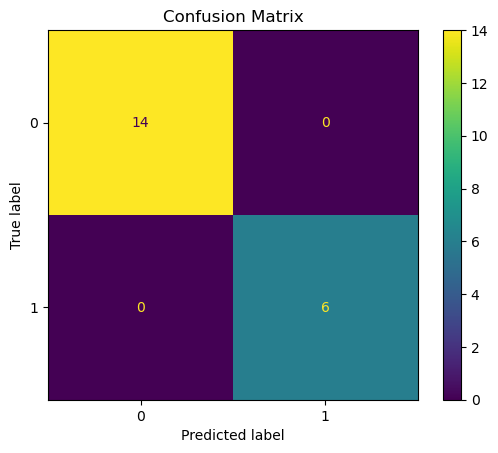

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test1, y_pred1)
plt.title("Confusion Matrix")
plt.show()


In [18]:
print(model1.named_steps)


{'simpleimputer': SimpleImputer(), 'randomforestclassifier': RandomForestClassifier()}


In [19]:
{'imputer': SimpleImputer(), 'randomforestclassifier': RandomForestClassifier()}

{'imputer': SimpleImputer(),
 'randomforestclassifier': RandomForestClassifier()}

In [20]:
feature_importances = model1.named_steps['randomforestclassifier'].feature_importances_


In [21]:
# If X is a DataFrame
feature_names = X.columns if hasattr(X, 'columns') else [f"Feature {i}" for i in range(len(feature_importances))]

import pandas as pd

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                    Feature  Importance
4                    Status    0.804983
2              Sub-Category    0.075167
1                  Category    0.057039
0  Estimated Effort (Hours)    0.044872
3                Risk Level    0.017939


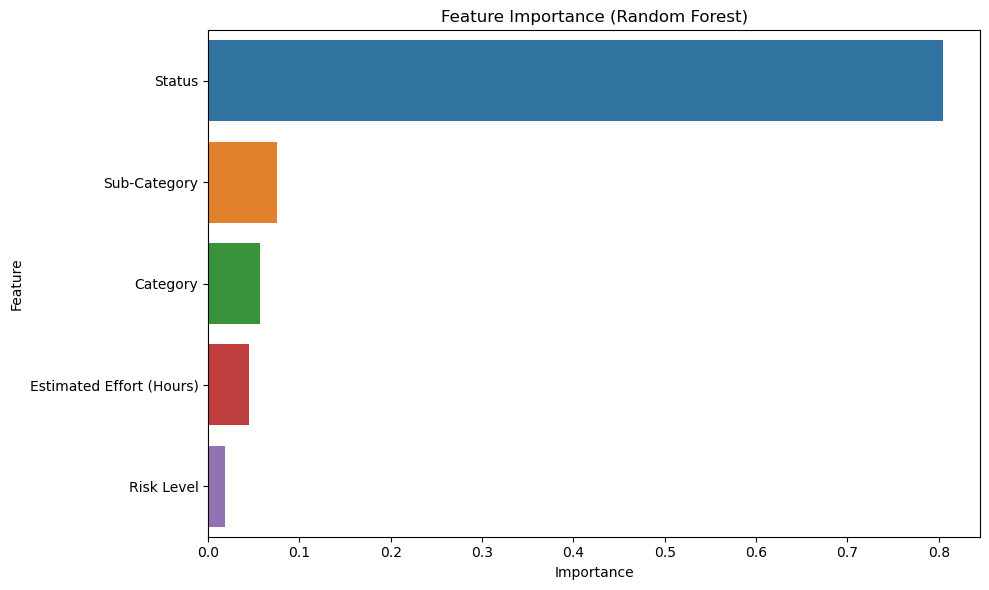

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


In [23]:
df.isnull().sum()

Task ID                      0
Task Name                    0
Description                  0
Priority                     0
Status                       0
Due Date                     0
Assigned To                  0
Created By                   0
Creation Date                0
Last Updated                75
Dependencies                 0
Estimated Effort (Hours)     0
Actual Effort (Hours)        0
Completion Percentage       75
Notes                        9
Category                     0
Sub-Category                 0
Location                     0
Risk Level                   0
Risk Description             0
Resolution Plan              0
Unnamed: 30                 62
On_Time_Completion           0
dtype: int64

In [33]:
train_pred1= model1.predict(X_train1)

In [34]:
from sklearn import metrics
r2_train1 = metrics.r2_score(y_train1,train_pred1) #r squared value
print('R squared value:',r2_train1)

R squared value: 1.0


In [35]:
test_pred1= model1.predict(X_test1)

In [36]:
r2_test1 = metrics.r2_score(y_test1,test_pred1) #r squared value
print('R squared value:',r2_test1)

R squared value: 1.0


PREDICTIVE MODEL

In [45]:
import joblib

# After training
joblib.dump(encoder, 'encoder.pkl')
joblib.dump(model1, 'model.pkl')

# Later when predicting
encoder = joblib.load('encoder.pkl')
model1 = joblib.load('model.pkl')


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

categorical_cols = ['Category', 'Risk Level', 'Status', 'Sub-Category']
numerical_cols = ['Estimated Effort (Hours)']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numerical_cols)
])

X_transformed = preprocessor.fit_transform(X_train1)
model1.fit(X_transformed, y_train1)


RandomForestClassifier()

In [61]:
import pandas as pd

# Step 1: Input new data in the same format as training
input_data = pd.DataFrame([{
    'Category': 'Software',
    'Risk Level': 'Medium',
    'Status': 'Ongoing',
    'Sub-Category': 'Development',
    'Estimated Effort (Hours)': 120
}])

# Step 2: Match the order of columns used during training
input_data = input_data[preprocessor.feature_names_in_]

# Step 3: Transform the new input using the same preprocessor
input_transformed = preprocessor.transform(input_data)

# Step 4: Use the trained model to predict
prediction = model1.predict(input_transformed)

# Step 5: Display the result
print('On Time completion:', prediction[0])


On Time completion: 1


In [65]:
# Step 4: Use the trained model to predict
prediction = model1.predict(input_transformed)

# Step 5: Print custom message based on prediction
# Step 5: Display the result with human-readable interpretation
if prediction[0] == 1:
    print("On time completion = Yes")
else:
    print("On time completion = No")


On time completion = Yes


In [58]:
import joblib

# Save
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(model1, 'model.pkl')


['model.pkl']

In [59]:
# Load
preprocessor = joblib.load('preprocessor.pkl')
model1 = joblib.load('model.pkl')
